# Stage and Stack Development

Developping stages and stacks with revised components.

In [1]:
import numpy as np
from src.tests.wrapper_stage import StageWrapper
from src.var_processor.pb_threshold import signal_pre_processor

[[-2.3594e+01 -1.0731e+01 -1.4115e+01  2.5484e+01 -1.1039e+01 -4.9600e+00
  -4.3480e+00  9.9440e+00 -1.6737e+01 -3.8590e+00  1.0800e+01  2.3009e+01
  -1.5710e+00 -1.0620e+00  5.5650e+00 -1.8130e+00  1.1330e+00  1.8036e+01
  -5.7740e+00  9.1860e+00  5.2560e+00 -7.2560e+00  1.4385e+01  2.9000e+00
  -1.4161e+01  2.4924e+01 -1.3342e+01 -9.5000e-02 -1.2700e-01  6.0100e-01
   9.8480e+00 -2.1520e+00  9.0980e+00 -6.0980e+00  6.0890e+00 -8.5600e+00
   4.7100e-01 -1.1003e+01 -1.1495e+01 -1.8622e+01 -6.1030e+00  1.0973e+01
  -3.8840e+00  4.7660e+00 -6.6880e+00 -1.5977e+01 -1.1640e+00  1.1100e+00
  -3.6500e-01 -3.0550e+00 -1.5100e-01 -5.5160e+00  5.5470e+00  7.1710e+00
  -5.3050e+00  3.6420e+00 -4.6850e+00  5.8770e+00 -5.2960e+00  6.4950e+00
  -5.1160e+00 -1.2724e+01  1.0037e+01  3.7350e+00 -1.9134e+01 -1.3196e+01
  -5.1620e+00  6.2440e+00 -3.9100e-01 -3.3909e+01  8.7400e+00 -6.5600e-01
   1.0963e+01  6.3860e+00 -1.0000e-02  1.2247e+01 -6.1700e-01  7.9500e-01
   2.1730e+00  1.1992e+01 -7.9130e+00 

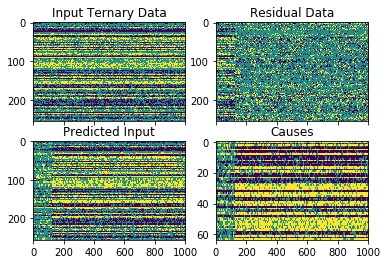

In [2]:
%matplotlib inline
# Initialise stage wrapper
size = 256
vec_len = 4
buf_length = 1000
wrapper = StageWrapper(size, vec_len, buf_length)

# Generate fake data
data_in = np.random.randint(254, size=(size, 1))
mean = np.asarray([127]*size).reshape(-1, 1)

for i in range(0, buf_length):
    # Convert to ternary
    input_signal = signal_pre_processor(data_in, mean)
    wrapper.iterate(input_signal)
    
error, mse = wrapper.error(data_in, mean)
print(error.T, mse)
wrapper.plot_buffers()

In [3]:
size = 256
vec_len = 4
buf_length = 500
i = 0
residual_array = np.zeros(shape=(size, 1, vec_len))
sum_err = np.zeros(shape=(size, 1))

# Initialise vec_len stages and wrappers
data_in = np.random.randint(254, size=(size, 1))
mean = np.asarray([127]*size).reshape(-1, 1)
# Generate vec_len stage wrappers
wrappers = [StageWrapper(size, vec_len, buf_length) for _ in range(0, vec_len)]
for _ in range(0, buf_length):
    # Iterate over stages
    input_signal = signal_pre_processor(data_in, mean)
    for w, wrapper in enumerate(wrappers):
        _, _, residual = wrapper.iterate(input_signal)
        residual_array[:, i, w] = residual.flatten()
        input_signal = residual
    
pred_estimate_sum = np.asarray([wrap.pred_estimate for wrap in wrappers]).sum(axis=0)
scale_factor = np.minimum(mean, 254-mean)
est = (mean+pred_estimate_sum*scale_factor).astype(np.uint8)
sum_err[:, i] = (data_in - est).astype(np.int16).flatten()
print(f"Iteration {i} - \nData: {data_in.T}\nEstimate: {est.T}\n\n")
MSE = np.abs(sum_err.astype(np.int8)).mean(axis=1); MSE

Iteration 0 - 
Data: [[128  33  84 143  39 235  23 242 144  14  17 230 173 211  28 246  51 132
  138  36 172 203 131 227 196  42  77  65   4   9 155 156 244  76 124  65
  220  29  21 192 104  50  40   3  20  32 108   9 159 111  55 129 196  66
  169  31  46 223 154  87 201  46 250  23 196 142 178  91  95 223 123 206
  123  98 169  86 136 253 104 195 174 166 217 223 227  84 142 143   0 116
  106 216 199 166 221 207 161   1 171 189  68 196  65 146  94  75 195 159
   35 167 203 193 236 201 155  98  85 135 150 215 117 138 232  37  43   5
   79  80 191 156  79 241  24  90 239 245 209  32 113 237  54 197  71 222
  208  90 141  13 213 177 247  66 103   3   1  22 106 106  50  92   0  49
  112  49 253 150 223 201 163  40 114  88 156 184  52 224  71  25  33 242
  191 107  40  22 157 209  11 241 178 155 192 244  45 154   6  32 129 109
   34 238  91  28 221  81 223 226  43 250  64 206 163  97 235 218  20 241
  115  10 247 142  86 178  53  68  21 175  88 169 141  60 142  72 209 184
  171 156 139 171

array([ 0., 15., 22.,  3.,  0.,  9.,  0., 10.,  4.,  8.,  2.,  0., 10.,
       17.,  3., 19., 22.,  7.,  5., 13.,  9.,  4.,  8.,  7., 15., 10.,
        1.,  9., 22., 11.,  6.,  5., 37.,  3., 10.,  4.,  3.,  7., 30.,
        3.,  3., 12., 13., 32.,  1.,  5.,  6., 13.,  2.,  0., 10., 15.,
       10., 22.,  4., 11.,  6.,  5.,  3.,  1., 11., 20., 29.,  3., 11.,
       15.,  6.,  6.,  8.,  1.,  3., 12.,  0.,  5.,  0.,  3.,  3., 37.,
       15.,  3.,  6.,  9., 16., 15., 11., 13.,  3.,  4., 28., 18., 13.,
        0.,  3.,  5., 14.,  3.,  7., 38., 32., 19.,  3.,  4., 15., 13.,
        2.,  2.,  1.,  5., 17.,  0.,  4.,  5., 28., 11.,  1., 11., 10.,
        2.,  6., 24., 10.,  1., 10.,  6., 20., 35.,  9.,  7., 18.,  2.,
       16., 20., 10., 13.,  2.,  7.,  3., 11., 17., 12.,  0.,  2.,  7.,
        9., 10.,  9., 20., 20.,  6., 15., 48., 14.,  9.,  0., 22., 20.,
        3.,  9., 11.,  4., 45.,  2., 23.,  4., 18., 20.,  2.,  3.,  8.,
       17.,  1.,  4.,  4.,  9., 26., 22.,  8., 11.,  2., 31.,  8

In [4]:
i, w

(0, 3)

We predict most of this on the first wrapper - we don't really need the others. Later on we are just trying to predict noise.

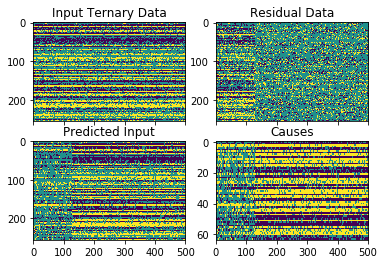

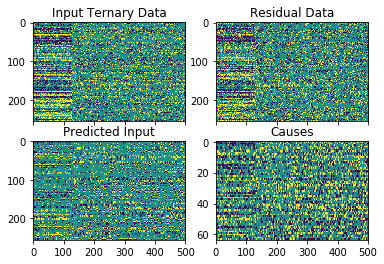

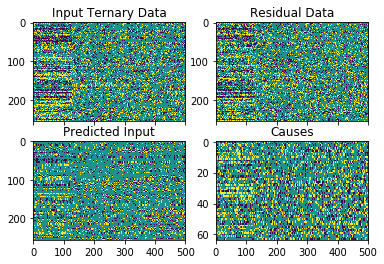

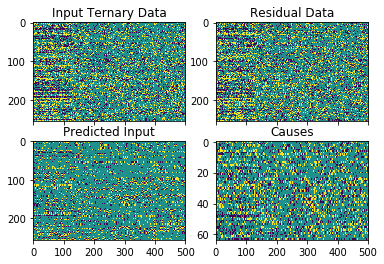

In [5]:
for w in wrappers:
    w.plot_buffers()

# Stacks

The data above looks good for building a stack - a series of stages.

Ah - originally we were trying to build in the switch. Maybe we start by just looking at forward and backward runs without the switch?

Lets start with alpha = 1 - so the input is the non-predicted input.

Each stages stores its last set of causes. So we can do a forward pass. Then use the buffered values to update the cov? It looks better not to have an explicit update_cov but to do this as part of the forward pass.

In [6]:
import math
from src.var_processor.stage import Stage

class Stack:
    """Object to process a 1D sensor signal."""

    def __init__(self, sensor_len, vec_len):
        """Initialise sensor.

        Arg:
            sensor_len - length of input sensor vector - needs to be
                a power of vec_len.
            vec_len - length of vector for VPU.
        """
        self.sensor_len = sensor_len
        self.vec_len = vec_len
        # self.time_len = time_len
        # Variable to store time stages
        self.stages = list()
        num_stages = math.log(self.sensor_len, self.vec_len)
        self.num_stages = int(num_stages)
        self.build_stages()

    def generate_stage(self, stage_len):
        """Generate a stage.

        Arg:
            stage_len - integer number of stages.
        """
        return Stage(self.vec_len, stage_len)

    def build_stages(self):
        """Build a set of stages."""
        self.stages = [
            self.generate_stage(
                int(self.sensor_len / self.vec_len**(i+1))
            )
            for i in range(0, self.num_stages)
        ]

    def forward(self, input_data, update_cov=True):
        """Forward pass through the stack.

        Args:
            input_data: 1D numpy array of ternary data.
        Returns:
            causes - numpy 1D array of causes.
        """
        # Iterate forward through the stages
        for stage in self.stages:
            if update_cov:
                stage.update_cov(input_data)
            input_signal = stage.forward(input_data)
        # Return scalar output from stack
        return input_signal

    def backward(self, stack_feedback):
        """Backward pass through the stack.

        Args:
            stack_feedback: feedback for last stage, scalar.
        """
        feedback_data = stack_feedback
        # Iterate through the stages backwards
        for stage in reversed(self.stages):
            feedback_data = stage.backward(feedback_data)
        # Return predicted data for stack
        return feedback_data

    def update_cov(self, input_data):
        """Update the covariance matrices in a series of stages.
        
        We only have the input data for a next stage after a previous
        stage has finished.
        
        It makes more sense to update covariance as part of a forward
        pass?

        Args:
            input_data: 1D numpy array of ternary data.
        """
        # Update first stage
        self.stages[0].update_cov(input_signal)
        # Perform a forward pass to get the causes
        self.forward(input_data)
        # Update each stage after the first using the causes
        for i in range(1, self.num_stages):
            # Get input data from previous stage
            input_data = self.stages[i-1].get_causes()
            # Pass to next stage to update_cov
            self.stages[i].update_cov(input_signal)

    def get_causes(self):
        """Return causes as a list of arrays."""
        return [
            stage.get_causes() for stage in self.stages
        ]

    def get_pred_inputs(self):
        """Return predicted inputs as a list of arrays."""
        return [
            stage.get_pred_inputs() for stage in self.stages
        ]

    def get_outputs(self):
        """Return the outputs for the stack."""
        cause_output = self.stages[-1].get_causes()
        prediction_output = self.stages[0].get_pred_inputs()
        return cause_output, prediction_output

    def get_lengths(self):
        """Return the vector lengths of the causes and predicted inputs."""
        causes = self.get_causes()
        pred_inputs = self.get_pred_inputs()
        cause_lengths = [cause.shape[0] for cause in causes]
        pred_lengths = [pred.shape[0] for pred in pred_inputs]
        return cause_lengths, pred_lengths

In [7]:
stack = Stack(256, 4)

In [8]:
# Generate fake data
data_in = np.random.randint(254, size=(size, 1))
mean = np.asarray([127]*size).reshape(-1, 1)

for i in range(0, buf_length):
    # Convert to ternary
    input_signal = signal_pre_processor(data_in, mean)
    r = stack.forward(input_signal)

In [9]:
for cause in stack.get_causes():
    print(cause.shape)

(64, 1)
(16, 1)
(4, 1)
(1, 1)


In [10]:
from pyinstrument import Profiler

profiler = Profiler()
profiler.start()

# code you want to profile ----- #
stack = Stack(256, 4)
# Generate fake data
data_in = np.random.randint(254, size=(size, 1))
mean = np.asarray([127]*size).reshape(-1, 1)

for i in range(0, buf_length):
    # Convert to ternary
    input_signal = signal_pre_processor(data_in, mean)
    r = stack.forward(input_signal)

# ----- #

profiler.stop()

print(profiler.output_text(unicode=True, color=True))


  _     ._   __/__   _ _  _  _ _/_   Recorded: 10:52:07  Samples:  6567
 /_//_/// /_\ / //_// / //_'/ //     Duration: 6.592     CPU time: 6.593
/   _/                      v3.1.3

Program: /home/ben/anaconda3/envs/var_processor/lib/python3.6/site-packages/ipykernel_launcher.py -f /run/user/1000/jupyter/kernel-cda2e1e5-a1ff-41ae-98e2-08cb2cad31ac.json

6.592 run_code  IPython/core/interactiveshell.py:3254
└─ 6.587 <module>  <ipython-input-10-da87695322b9>:12
   └─ 6.565 forward  <ipython-input-6-60bb430996a0>:41
      ├─ 3.485 update_cov  src/var_processor/stage.py:74
      │  ├─ 2.860 update_cov  src/var_processor/vpu.py:107
      │  │  ├─ 1.370 update_cov  src/var_processor/covariance.py:34
      │  │  │  ├─ 1.138 [self]  
      │  │  │  └─ 0.231 recursive_update  src/var_processor/covariance.py:51
      │  │  │     └─ 0.225 [self]  
      │  │  ├─ 1.282 iterate  src/var_processor/power_iterator.py:53
      │  │  │  ├─ 0.866 normalise  src/var_processor/power_iterator.py:6
      │  

Interesting that it is mostly 50-50 between updating the covariance and performing a forward pass.

Buf_length is 500 - so we can actually do in real time - this is 500 forward passes in 6 seconds.

## Visualising the Stack

How do we visualise the stack?

The subplots from the stage wrappers were useful. We could print out for each stage?

We have a set of input/cause buffers and a set of prediction buffers.

In [11]:
stack.get_lengths()

([64, 16, 4, 1], [256, 64, 16, 4])

In [12]:
stack.get_causes()

[array([[-1],
        [ 0],
        [ 0],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [ 0],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [ 0],
        [-1],
        [ 0],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 0],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 0],
        [ 0],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 0],
        [-1],
        [-1],
        [ 0],
        [ 1],
        [-1],
        [ 0],
        [-1],
        [ 0],
        [ 1],
        [ 1],
        [ 0],
        [ 1],
        [ 0],
        [-1],
        [ 1]], dtype=int8), array([[-1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
       

In [13]:
stack.get_pred_inputs()

[array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],

In [14]:
stack.num_stages

4

In [15]:
import matplotlib.pyplot as plt

sen_length = 256
size = 4
buf_length = 500
stack = Stack(sen_length, size)
# Get lengths of causes & predictions
cause_lengths, pred_lengths = stack.get_lengths()
# Generate buffers for each
input_buffers = [np.zeros(shape=(cl, buf_length), dtype=np.int8) for cl in cause_lengths]
pred_buffers = [np.zeros(shape=(pl, buf_length), dtype=np.int8) for pl in pred_lengths]
# Generate buffer for residuals (same size as prediction buffer) - buffer.copy() doesn't work - it syncs the two
residual_buffers = [np.zeros(shape=(pl, buf_length), dtype=np.int8) for pl in pred_lengths]
# Also add an initial entry in the input buffers for the original input
input_buffers.insert(0, np.zeros(shape=(sen_length, buf_length), dtype=np.int8))
# Generate fake data
data_in = np.random.randint(254, size=(sen_length, 1), dtype=np.uint8)
mean = np.asarray([127]*sen_length, dtype=np.uint8).reshape(-1, 1)

for i in range(0, buf_length):
    # Convert to ternary
    input_signal = signal_pre_processor(data_in, mean)
    # Add to buffer
    input_buffers[0][:, i] = input_signal.ravel()
    # Forward pass
    r = stack.forward(input_signal)
    causes = stack.get_causes()
    # Store in buffers
    for c, cause in enumerate(causes):
        input_buffers[c+1][:, i] = cause.ravel()
    input_buffers[-1][:, i] = r
    # Perform backward pass for predictions
    pred_inputs = stack.backward(r)
    preds = stack.get_pred_inputs()
    # Store in buffers & compute residuals
    for p, pred in enumerate(preds):
        pred_buffers[p][:, i] = pred.ravel()
        # Compute and clamp residuals
        residuals = np.clip(input_buffers[p][:, i] - pred.ravel(), -1, 1)
        residual_buffers[p][:, i] = residuals
    

In [16]:
for p, pred in enumerate(preds):
    print(pred.ravel())
    # Compute and clamp residuals
    print(np.clip(input_buffers[p][:, 499] - pred.ravel(), -1, 1))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  1  1  1  0
  1  1  1  1 -1 -1 -1  0  1  0  1  1  0  0  0  0 -1 -1  0  0  1  1  1  0
  1  1  1  1  0 -1 -1 -1 -1 -1  0 -1  0  0  0  0  0  0  0  0  1  1  0  1
  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  0  0  0  0 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1  0 -1 -1  0  0  0  0 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1  0  1  1  1  0  1  1  1
  0  0  0  0  1  0  1  0  1  1  1  0  1  1  0  1 -1  0 -1 -1 -1 -1 -1  0
  0  0  0  0 -1 -1 -1 -1  0  1  1  1  0  0  0  0  1  0  1  0 -1 -1 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  0  1  1
  1  1  0  1  1  1  1  1  1  0  0  1  1  1  1  1  0  1  1  1  1  1  0  1
  1  1  1  0  1  1  0  1  1  0  0  1  1  1  1  1  1  1  1  1  0  0 -1  0
 

In [17]:
preds[2].ravel()

array([ 0,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  0],
      dtype=int8)

In [18]:
input_buffers[2][:, 499]

array([-1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1],
      dtype=int8)

In [19]:
input_buffers[2][:, 499]-preds[2].ravel()

array([-1, -1, -1,  1,  0,  0,  0,  2, -2,  0,  0,  0,  0, -2,  0,  1],
      dtype=int8)

In [20]:
np.clip(input_buffers[2][:, 499]-preds[2].ravel(), -1, 1)

array([-1, -1, -1,  1,  0,  0,  0,  1, -1,  0,  0,  0,  0, -1,  0,  1],
      dtype=int8)

In [21]:
pred_buffers[2][:, 499], residual_buffers[2][:, 499]

(array([ 0,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  0],
       dtype=int8),
 array([-1, -1, -1,  1,  0,  0,  0,  1, -1,  0,  0,  0,  0, -1,  0,  1],
       dtype=int8))

Ah - it's the preds that aren't being stored - it's storing the residuals as the preds.

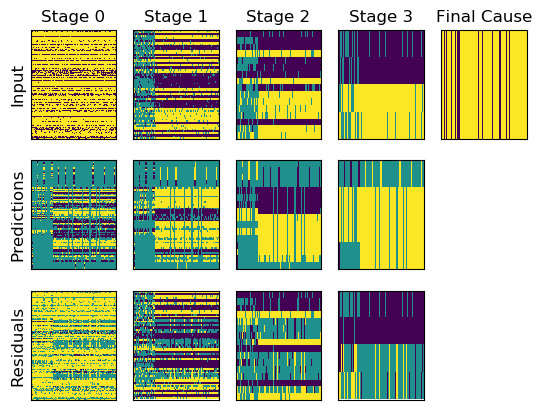

In [22]:
"""Plot buffer contents for quick check."""
# Plot in greyscale for patent figures
plt.style.use('default')
# Plot inputs/preds/residuals
fig, axes = plt.subplots(3, stack.num_stages+1, sharex=True)
# Plot inputs
for i, input_buffer in enumerate(input_buffers):
    axes[0, i].imshow(input_buffer, aspect='auto')
# Plot predictions
for i, pred_buffer in enumerate(pred_buffers):
    axes[1, i].imshow(pred_buffer, aspect='auto')
# Plot residuals
for i, residual_buffer in enumerate(residual_buffers):
    axes[2, i].imshow(residual_buffer, aspect='auto')
# Define title text
col_text = [f"Stage {i}" for i in range(0, stack.num_stages)]
col_text.append("Final Cause")
row_text = ["Input", "Predictions", "Residuals"]
# Set column labels
for ax, col in zip(axes[0], col_text):
    ax.set_title(col)
# Set row labels
for ax, row in zip(axes[:, 0], row_text):
    ax.set_ylabel(row, rotation=90, size='large')
# Remove ticks and labels
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
fig.subplots_adjust(hspace=0.2)
# Hide unused subplots
axes[1, 4].set_visible(False)
axes[2, 4].set_visible(False)
plt.show()

This can become a stack wrapper...

The stripes are areas where the ev is all 1s.

60.6015625


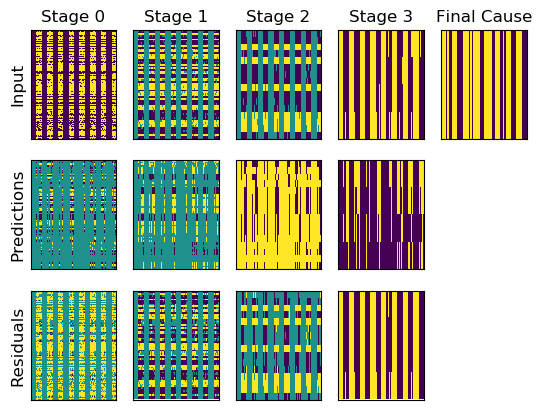

In [23]:
from src.tests.wrapper_stack import StackWrapper
# from src.var_processor.pb_threshold import signal_pre_processor

buf_length = 500
sen_length = 256
vec_len = 4
wrapper = StackWrapper(sen_length, vec_len, buf_length=buf_length)

# Generate fake data
data_in = np.random.randint(254, size=(sen_length, 1), dtype=np.uint8)
mean = np.asarray([127]*sen_length, dtype=np.uint8).reshape(-1, 1)

for i in range(0, buf_length):
    # Convert to ternary
    input_signal = signal_pre_processor(data_in, mean)
    wrapper.iterate(input_signal)
error, mse = wrapper.error(data_in, mean)
print(mse)
wrapper.plot_buffers()

The residuals appear to be the same as the predictions. Is that right?

In [24]:
error.astype(np.int8).T

array([[ -27,   51,   57,   60,  125,    5, -108,  -31,  -61,  -95, -123,
          34,   56,  112,    3,   98,  -53,  -22,  124,  -37,  -88, -128,
          28,  -73,  -65,    8, -128,   20,    1,  -32,  112,   14,  -74,
         113, -113,   79,  -29,    1,    9,   96,  124,  -94,   67,   38,
           1, -124,   69,   95,  -34, -109,    8,   39,  -75,   15,   89,
         -31,  108,   74, -111,  -76,  -86, -117,   33,   64,  -96,  -19,
          48,   91,   69,  -44,  -23,   93,   81,   22,   77,   35,   31,
          50,  -30, -109,  -84,   54,   42,  -87,  105,  -97,   13,   16,
         105,  103, -125,   95,  -56, -110,    8,   15,   45,   26,    3,
           0,   19, -117,   36,  -58,   13,  -40,   87,  -12,   22,  -64,
          99,  -21,  -64,  -77,   58,  -75,   23,    0,   37,   60,   -4,
          19,    7,   96,  111,  103,  -29,  102,   16,  -89, -117,   -8,
        -114,   23,  -33,   24,   34,  -65,   -1,  -63,    6, -118, -106,
         -97,   35,   23,  -69,   46, 

Test with random data as each entry...

67.62890625


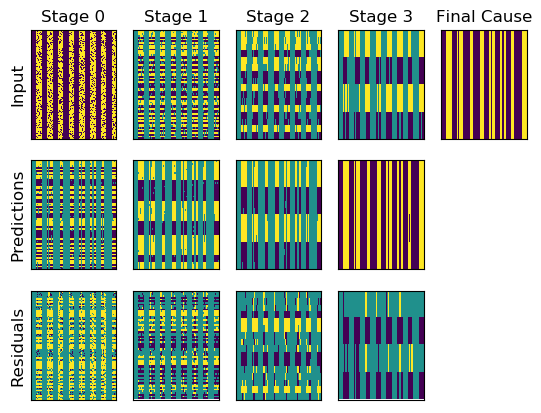

In [25]:
buf_length = 500
sen_length = 256
vec_len = 4
wrapper = StackWrapper(sen_length, vec_len, buf_length=buf_length)


mean = np.asarray([127]*sen_length, dtype=np.uint8).reshape(-1, 1)

for i in range(0, buf_length):
    # Generate fake data
    data_in = np.random.randint(254, size=(sen_length, 1), dtype=np.uint8)
    # Convert to ternary
    input_signal = signal_pre_processor(data_in, mean)
    wrapper.iterate(input_signal)
error, mse = wrapper.error(data_in, mean)
print(mse)
wrapper.plot_buffers()

Two stacks - one taking the end residuals of the other...

In [26]:
buf_length = 500
sen_length = 256
vec_len = 4

# Create a set of wrappers for multiple stacks
wrappers = [
    StackWrapper(sen_length, vec_len, buf_length=buf_length)
    for i in range(0, vec_len)
]

mean = np.asarray([127]*sen_length, dtype=np.uint8).reshape(-1, 1)

for i in range(0, buf_length):
    # Generate fake data
    data_in = np.random.randint(254, size=(sen_length, 1), dtype=np.uint8)
    # Iterate over stacks
    input_signal = signal_pre_processor(data_in, mean)
    for wrapper in wrappers:
        _, _, residual = wrapper.iterate(input_signal)
        input_signal = residual

/home/ben/projects/var_processor/src/var_processor/power_iterator.py:17: RuntimeWarning: invalid value encountered in floor_divide
  scaled_array = (np.abs(array)*127//sq_root_sum)*signs


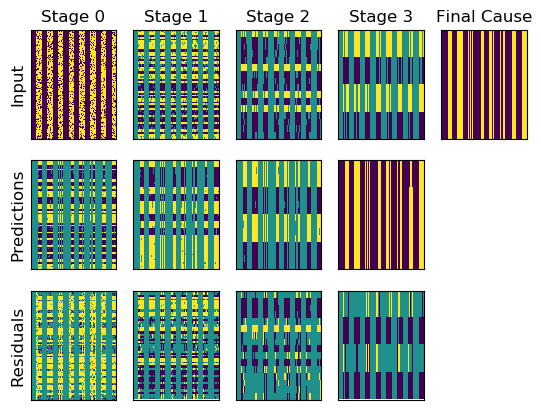

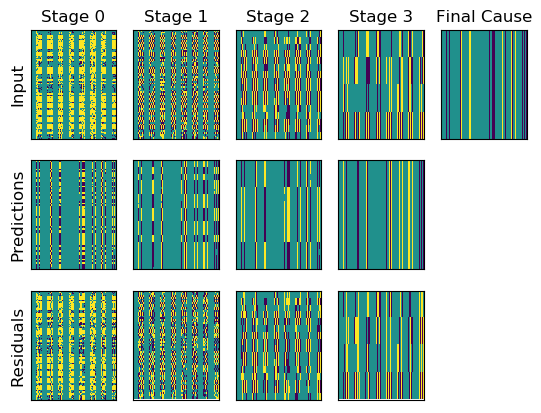

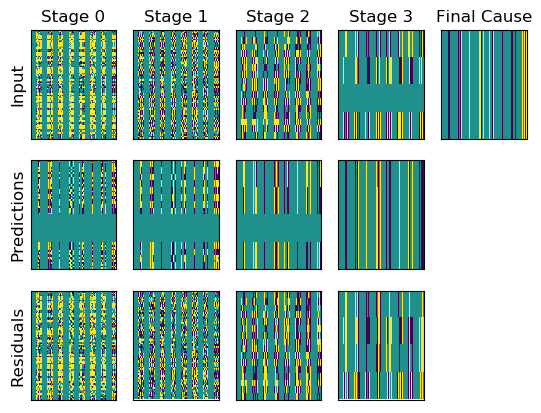

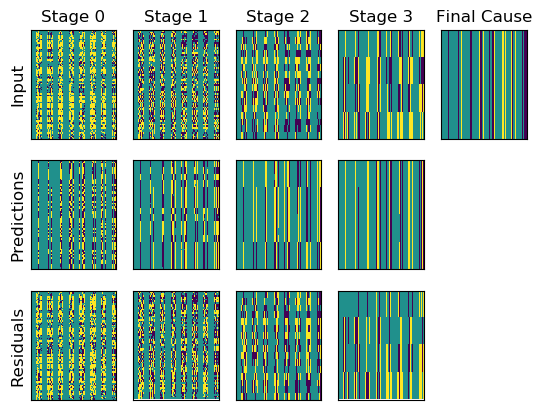

In [27]:
%matplotlib inline
for wrapper in wrappers:
    wrapper.plot_buffers()